In [1]:
# import os
# import gym
# import numpy as np
# from agent import DuelingDDQNAgent
# from utils import plot_learning_curve, make_env
from IPython.display import clear_output

In [5]:
import os
import gym
import numpy as np
import agent as Agents
from utils import plot_learning_curve, make_env
import  argparse

In [6]:
env_name='PongNoFrameskip-v4'

env = make_env(env_name=env_name,repeat=4,
                  clip_rewards=False, no_ops=0,
                  fire_first=False)

gamma  =0.99
epsilon=1.0
lr     =0.0001
input_dims=env.observation_space.shape
n_actions=env.action_space.n
mem_size=50000
eps_min=0.1
batch_size=32
replace=1000
eps_dec=1e-5
chkpt_dir='models/'
algo='DuelingDDQNAgent'

n_games = 1000
load_checkpoint = False

A.L.E: Arcade Learning Environment (version 0.7.4+069f8bd)
[Powered by Stella]
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [8]:
agent_ = getattr(Agents, algo)
agent = agent_(gamma       = gamma,
              epsilon    = epsilon,
              lr         = lr,
              input_dims = env.observation_space.shape,
              n_actions  = env.action_space.n,
              mem_size   = mem_size,
              eps_min    = eps_min,
              batch_size = batch_size,
              replace    = replace,
              eps_dec    = eps_dec,
              chkpt_dir  = chkpt_dir,
              algo       = algo,
              env_name   = env_name)


In [9]:
 # agent = DuelingDDQNAgent(gamma       = gamma,
 #                          epsilon    = epsilon,
 #                          lr         = lr,
 #                          input_dims = env.observation_space.shape,
 #                          n_actions  = env.action_space.n,
 #                          mem_size   = mem_size,
 #                          eps_min    = eps_min,
 #                          batch_size = batch_size,
 #                          replace    = replace,
 #                          eps_dec    = eps_dec,
 #                          chkpt_dir  = chkpt_dir,
 #                          algo       = algo,
 #                          env_name   = env_name)

episode:  990 score:  15.0  average score 16.4 best score 16.84 epsilon 0.10 steps 2100759
episode:  991 score:  17.0  average score 16.4 best score 16.84 epsilon 0.10 steps 2102620
episode:  992 score:  16.0  average score 16.4 best score 16.84 epsilon 0.10 steps 2104616
episode:  993 score:  13.0  average score 16.4 best score 16.84 epsilon 0.10 steps 2106828
episode:  994 score:  15.0  average score 16.4 best score 16.84 epsilon 0.10 steps 2109130
episode:  995 score:  19.0  average score 16.4 best score 16.84 epsilon 0.10 steps 2111042
episode:  996 score:  11.0  average score 16.3 best score 16.84 epsilon 0.10 steps 2113474
episode:  997 score:  14.0  average score 16.3 best score 16.84 epsilon 0.10 steps 2115820
episode:  998 score:  20.0  average score 16.4 best score 16.84 epsilon 0.10 steps 2117599
episode:  999 score:  17.0  average score 16.3 best score 16.84 epsilon 0.10 steps 2119635


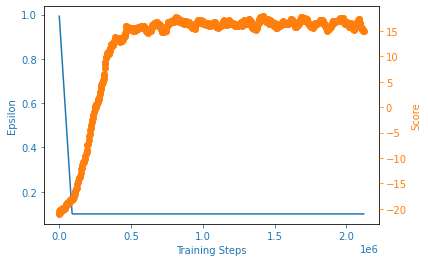

In [10]:
best_score = -np.inf
fname = algo + '_' + env_name + '_alpha' + str(lr) +'_' \
        + str(n_games) + 'games'
figure_file = 'plots/' + fname + '.png'
scores_file = fname + '_scores.npy'

scores, eps_history = [], []
n_steps = 0
steps_array = []
for i in range(n_games):
    done = False
    observation = env.reset()
    score = 0
    while not done:
        action = agent.choose_action(observation)
        observation_, reward, done, info = env.step(action)
        score += reward

        if not load_checkpoint:
            agent.store_transition(observation, action,
                                 reward, observation_, int(done))
            agent.learn()
        observation = observation_
        n_steps += 1
    scores.append(score)
    steps_array.append(n_steps)

    avg_score = np.mean(scores[-100:])
    
    if not bool(i%10):clear_output()
    print('episode: ', i,'score: ', score,
         ' average score %.1f' % avg_score, 'best score %.2f' % best_score,
        'epsilon %.2f' % agent.epsilon, 'steps', n_steps)

    if avg_score > best_score:
        if not load_checkpoint:
            agent.save_models()
        best_score = avg_score

    eps_history.append(agent.epsilon)
    if load_checkpoint and n_steps >= 18000:
        break

x = [i+1 for i in range(len(scores))]
plot_learning_curve(steps_array, scores, eps_history, figure_file)